# Airline fair prediction project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\Mahum\Downloads\Flight_Price_resources\Data_Train.xlsx")
pd.set_option('display.max_columns',None)
data=pd.DataFrame(df)
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.shape

(10683, 11)

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Removing missing values

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
# chaniging the datatype
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [8]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [9]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [10]:
data['journey_day']=data['Date_of_Journey'].dt.day
data['journey_month']=data['Date_of_Journey'].dt.month
data['journey_year']=data['Date_of_Journey'].dt.year

In [11]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-04 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-04 05:50:00,2024-04-04 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-04 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


In [12]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute

In [13]:
extract_hour_min(data,'Dep_Time')

In [14]:
extract_hour_min(data,'Arrival_Time')

In [15]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-04 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-04 05:50:00,2024-04-04 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-04 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [16]:
drop_col=['Dep_Time', 'Arrival_Time']
data.drop(drop_col,axis=1,inplace=True)

In [17]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


In [18]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "early morning"
    elif (x>8) and (x<=12):
        return "morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "late night"
    
        

<AxesSubplot:>

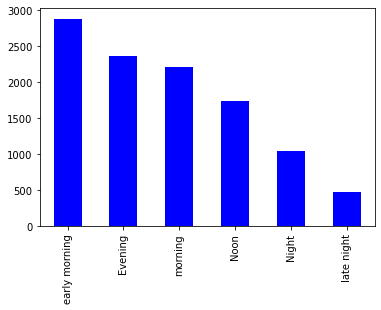

In [19]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar',color="blue")

In [20]:
def preprocess_dur(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x
data['Duration']=data['Duration'].apply(preprocess_dur)
data['Duration'].dtypes
data['Duration_h']=data['Duration'].apply(lambda x: x.split(' ')[0][0:-1])


In [21]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [22]:
data['Duration_h']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_h, Length: 10682, dtype: object

In [23]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_h
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25,2
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20,3
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10,2


In [24]:
data['Duration_m']=data['Duration'].apply(lambda x: x.split(' ')[1][0:-1])

In [25]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_h,Duration_m
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10,2,40


In [26]:
eval('2*60')

120

In [27]:

data['duration_total_min']=data['Duration'].str.replace('h',"*60").str.replace(' ',' + ').str.replace('m',"*1").apply(eval)

In [28]:
data['duration_total_min']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: duration_total_min, Length: 10682, dtype: int64

<AxesSubplot:xlabel='duration_total_min', ylabel='Price'>

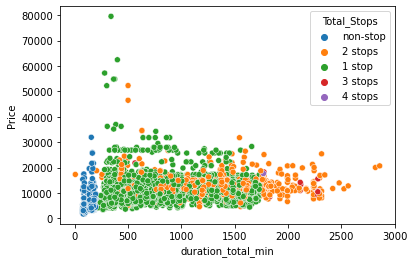

In [29]:
sns.scatterplot(x="duration_total_min", y="Price",hue='Total_Stops',data=data)

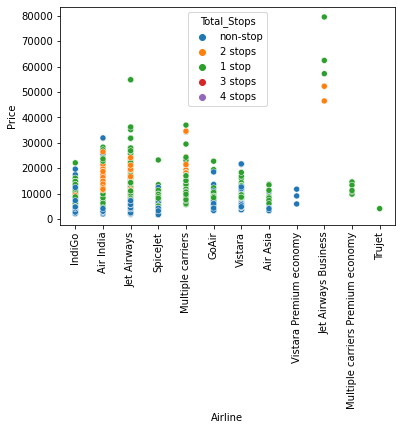

In [30]:
sns.scatterplot(x="Airline", y="Price",hue= 'Total_Stops',data=data)
plt.xticks(rotation="vertical")
plt.show()

In [31]:
# getting  information about on which route does the jet airways flight is used the most and least.
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
BOM → BDQ → DEL → HYD      2
DEL → DED → BOM → COK      2
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

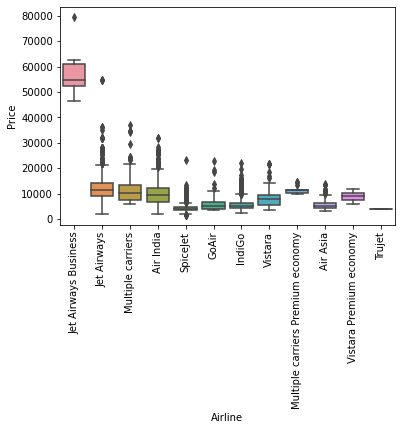

In [32]:
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation="vertical")
plt.show()

# Feature Encoding for string type data so that it is easy for inputing in the machine learning model

In [33]:
cat_col=[col for col in data.columns if data[col].dtype=='object']
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Duration_h',
 'Duration_m']

In [34]:
num_col=[col for col in data.columns if data[col].dtype!='object']
num_col

['Date_of_Journey',
 'Price',
 'journey_day',
 'journey_month',
 'journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'duration_total_min']

# One hot encoding 

In [35]:
for sub in data['Source'].unique():
    data['source'+sub]=data['Source'].apply(lambda x: 1 if x==sub else 0)

In [36]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_h,Duration_m,duration_total_min,sourceBanglore,sourceKolkata,sourceDelhi,sourceChennai,sourceMumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140,0,0,1,0,0


# Target encoding for Airline feature

In [37]:
data['Airline'].nunique()

12

In [38]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [39]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [40]:
dict_airline={key:index for index, key in enumerate(airlines,0)}

In [41]:
dict_airline

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [42]:
data['Airline']=data['Airline'].map(dict_airline)

In [43]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

# Target encoding for Destination feature

In [44]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [45]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [46]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [47]:
des=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [48]:
des

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [49]:
dict_des={key:index for index, key in enumerate(des,0)}

In [50]:
dict_des

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [51]:
data['Destination']=data['Destination'].map(dict_des)

In [52]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

# label encoding on Total Stops

In [53]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [54]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

# replacing above unique stops with their number as in creating a dictionary 

In [55]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [56]:
stop

{'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [57]:
data['Total_Stops']=data['Total_Stops'].map(stop)

# mannually removing features which are irrelevant

In [58]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month', 'journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_h', 'Duration_m',
       'duration_total_min', 'sourceBanglore', 'sourceKolkata', 'sourceDelhi',
       'sourceChennai', 'sourceMumbai'],
      dtype='object')

In [59]:
data.drop(columns=['Date_of_Journey','Source','Additional_Info','Route','journey_year','duration_total_min', 'Duration'],axis=1,inplace=True)

In [60]:
data.head(3)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_h,Duration_m,sourceBanglore,sourceKolkata,sourceDelhi,sourceChennai,sourceMumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


# Removing Outliers

In [61]:
# detecting outliers using box plot
# since proce is th target variable we will be using that variable as a main variable for the detection
def plot(df,col):
    fig,(ax1,ax2,ax3)= plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3, kde=False)

C:\Users\Mahum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mahum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mahum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

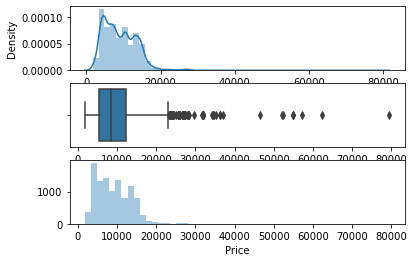

In [62]:
plot(data,'Price')

In [63]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)
iqr=q3-q1
maximum=q3+1.5*iqr
minimum=q3-1.5*iqr
print(maximum)
print(minimum)


23017.0
1729.0


In [64]:
len([p for p in data['Price']if (p>maximum) or (p<minimum)])

94

In [65]:
np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

C:\Users\Mahum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mahum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mahum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

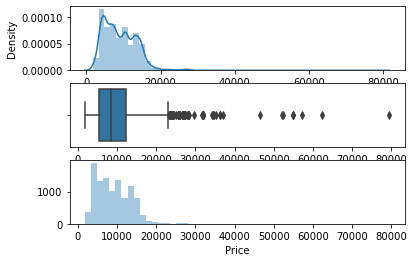

In [66]:
plot(data,'Price')

# Feature Selection

In [67]:
X= data.drop(['Price'],axis=1)
Y=data['Price']
print(X)

       Airline  Destination  Total_Stops  journey_day  journey_month  \
0            3            2            0           24              3   
1            7            3            2            5              1   
2           10            4            2            6              9   
3            3            3            1            5             12   
4            3            2            1            3              1   
...        ...          ...          ...          ...            ...   
10678        2            3            0            4              9   
10679        7            3            0           27              4   
10680       10            2            0           27              4   
10681        5            2            0            3              1   
10682        7            4            2            5              9   

       Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  \
0                 22               20                 

In [68]:
print(Y)

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64


In [84]:
Y.any()
X.any()

Airline                True
Destination            True
Total_Stops            True
journey_day            True
journey_month          True
Dep_Time_hour          True
Dep_Time_minute        True
Arrival_Time_hour      True
Arrival_Time_minute    True
Duration_h             True
Duration_m             True
sourceBanglore         True
sourceKolkata          True
sourceDelhi            True
sourceChennai          True
sourceMumbai           True
dtype: bool

In [70]:
import sklearn
from sklearn.feature_selection import mutual_info_regression

In [71]:
feature=mutual_info_regression(X,Y)

In [72]:
feature

array([1.32028642, 1.06583935, 0.78928747, 0.60475273, 0.42380657,
       0.92313737, 0.76308342, 1.14424437, 0.9114228 , 1.12713809,
       0.67456563, 0.39849225, 0.4553195 , 0.51541529, 0.13465436,
       0.20111293])

In [73]:
imp=pd.DataFrame(feature,index=X.columns)
imp.columns=['importance']

In [74]:
imp.sort_values(by='importance',ascending=False)

,importance
Airline,1.320286
Arrival_Time_hour,1.144244
Duration_h,1.127138
Destination,1.065839
Dep_Time_hour,0.923137
Arrival_Time_minute,0.911423
Total_Stops,0.789287
Dep_Time_minute,0.763083
Duration_m,0.674566
journey_day,0.604753


# Applying ML models

In [75]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Assuming you have a dataset X (features) and y (labels/targets)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [76]:
# getting the prediction value
from sklearn.ensemble import RandomForestRegressor
ml_model=RandomForestRegressor()
ml_model.fit(X_train,y_train)
pred1=ml_model.predict(X_test)
pred1

array([16752.64      ,  6468.01      ,  8843.24      , ...,
        6573.44      , 12918.23033333, 13032.9765    ])

In [77]:
# checking the accuracy
accuracy_test = metrics.r2_score(y_test, pred1)
accuracy_test

0.7918642028561939

# Defining MAPE

In [78]:
def mape(y_true, y_pred):
    y_true, y_pred= np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))* 100

In [79]:
mape(y_test, pred1)

13.231595375889693

# Automating ML pipeline and Defining Evaluation metric

In [80]:
from sklearn.model_selection import cross_val_score, KFold # cross validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

def pred(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('training Score: {}'.format(model.score(X_train,  y_train)))
    prediction=model.predict(X_test)
    print('Predictions are: {}'.format(prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test, prediction)
    print('R2 score: {}'.format(r2_score))
    cross_val_results = cross_val_score(model, X_test, y_test, cv=kf)
    print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
    print(f'Mean Accuracy: {cross_val_results.mean()}')

In [81]:
pred(RandomForestRegressor())

training Score: 0.9526110582406482
Predictions are: [16702.24        6537.56        9009.77       ...  6712.82
 12590.60333333 13190.572     ]


R2 score: 0.7922618412839397
Cross-Validation Results (Accuracy): [0.80238694 0.82348915 0.74349265 0.62997364 0.76247951]
Mean Accuracy: 0.7523643772808496


In [82]:
from sklearn.tree import DecisionTreeRegressor
pred(DecisionTreeRegressor(random_state=0))

training Score: 0.9692484150527355
Predictions are: [16840.  6976.  9187. ...  6794. 13339. 14335.]


R2 score: 0.696819383657088
Cross-Validation Results (Accuracy): [0.68389978 0.68776489 0.51011979 0.4962743  0.65676746]
Mean Accuracy: 0.6069652455690939


In [83]:
from sklearn.linear_model import LinearRegression
pred(LinearRegression())

training Score: 0.534529159790026
Predictions are: [13029.18341588  8984.05955194  8859.55359036 ...  6179.29215751
 10439.12355024 11856.12440299]


R2 score: 0.5303846995332404
Cross-Validation Results (Accuracy): [0.58268971 0.51756805 0.53154769 0.50793487 0.47548827]
Mean Accuracy: 0.5230457171953662
